In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf

In [6]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.cifar10.load_data()
class2txt = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 2s 0us/step


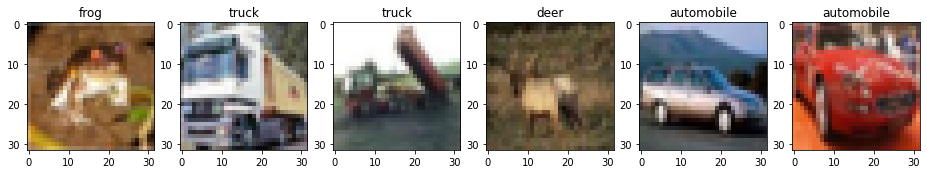

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
for i in range(len(axes)):
    axes[i].set_title(class2txt[y_train_raw[i, 0]])
    axes[i].imshow(x_train_raw[i])

In [8]:
x_train = (x_train_raw - x_train_raw.mean()) / x_train_raw.std()
x_test = (x_test_raw - x_train_raw.mean()) / x_train_raw.std()
print('x_train.shape', x_train.shape)
print('x_test.shape', x_test.shape)

x_train.shape (50000, 32, 32, 3)
x_test.shape (10000, 32, 32, 3)


In [9]:
y_train = tf.keras.utils.to_categorical(y_train_raw, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_classes=10)
print('y_train.shape', y_train.shape)
print(y_train[:3])

y_train.shape (50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
from tensorflow.keras.layers import Input, InputLayer, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [11]:
X_input = Input(shape=[32, 32, 3])

X = Conv2D(filters=16, kernel_size=3, padding='same', activation='elu')(X_input)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Conv2D(filters=32, kernel_size=3, padding='same', activation='elu')(X)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Conv2D(filters=64, kernel_size=3, padding='same', activation='elu')(X)
X = MaxPooling2D(pool_size=[2,2], strides=[2, 2], padding='same')(X)

X = Flatten()(X)
X = Dropout(0.2)(X)

X = Dense(512, activation='elu')(X)
X = Dropout(0.2)(X)

X = Dense(10, activation='softmax')(X)

model = tf.keras.Model(inputs=X_input, outputs=X)

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496 

In [13]:
hist = model.fit(x=x_train, y=y_train, batch_size=250, epochs=20,
                 validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
200/200 - 47s - loss: 1.4378 - accuracy: 0.4940 - val_loss: 1.1516 - val_accuracy: 0.6018 - 47s/epoch - 233ms/step
Epoch 2/20
200/200 - 45s - loss: 1.1053 - accuracy: 0.6132 - val_loss: 1.0236 - val_accuracy: 0.6444 - 45s/epoch - 224ms/step
Epoch 3/20
200/200 - 44s - loss: 0.9953 - accuracy: 0.6539 - val_loss: 0.9806 - val_accuracy: 0.6625 - 44s/epoch - 220ms/step
Epoch 4/20
200/200 - 44s - loss: 0.9308 - accuracy: 0.6772 - val_loss: 0.9429 - val_accuracy: 0.6717 - 44s/epoch - 219ms/step
Epoch 5/20
200/200 - 45s - loss: 0.8810 - accuracy: 0.6920 - val_loss: 0.8810 - val_accuracy: 0.6957 - 45s/epoch - 225ms/step
Epoch 6/20
200/200 - 45s - loss: 0.8235 - accuracy: 0.7115 - val_loss: 0.8601 - val_accuracy: 0.7061 - 45s/epoch - 225ms/step
Epoch 7/20
200/200 - 47s - loss: 0.7848 - accuracy: 0.7250 - val_loss: 0.8401 - val_accuracy: 0.7090 - 47s/epoch - 235ms/step
Epoch 8/20
200/200 - 44s - loss: 0.7460 - accuracy: 0.7379 - val_loss: 0.8046 - val_accuracy: 0.7228 - 44s/epoch - 218

In [14]:
loss, acc = model.evaluate(x_train, y_train, batch_size=250, verbose=0)
print(f'Accuracy on train set: {acc:.3f}')
loss, acc = model.evaluate(x_test, y_test, batch_size=250, verbose=0)
print(f'Accuracy on test set:  {acc:.3f}')

Accuracy on train set: 0.957
Accuracy on test set:  0.768


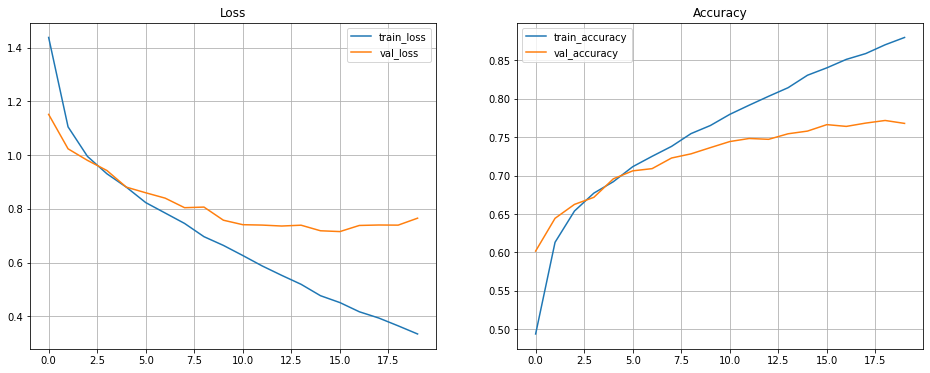

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[16, 6])
axes[0].plot(hist.history['loss'], label='train_loss')
axes[0].plot(hist.history['val_loss'], label='val_loss')
axes[0].set_title('Loss')
axes[0].legend()
axes[0].grid()
axes[1].plot(hist.history['accuracy'], label='train_accuracy')
axes[1].plot(hist.history['val_accuracy'], label='val_accuracy')
axes[1].set_title('Accuracy')
axes[1].legend()
axes[1].grid()